# NBA Player Value based on Win-Shares and Salary

In [1]:
#import required packages
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv


### Create Dataframe from csv
#### Last updated 4/7/2019, includes games through 4/6/2019


In [2]:
#creating player stats df from csv
df_stats = pd.read_csv('nba_player_stats.csv')

In [3]:
print(df_stats)

      Rk                  Player  Pos  Age   Tm   G    MP   PER    TS%   3PAr  \
0      1            Alex Abrines   SG   25  OKC  31   588   6.3  0.507  0.809   
1      2              Quincy Acy   PF   28  PHO  10   123   2.9  0.379  0.833   
2      3            Jaylen Adams   PG   22  ATL  32   393   7.9  0.479  0.689   
3      4            Steven Adams    C   25  OKC  77  2593  18.9  0.596  0.003   
4      5             Bam Adebayo    C   21  MIA  79  1841  17.8  0.623  0.028   
5      6               Deng Adel   SF   21  CLE  17   187   1.7  0.376  0.629   
6      7  DeVaughn Akoon-Purcell   SG   25  DEN   7    22   8.2  0.322    0.4   
7      8       LaMarcus Aldridge    C   33  SAS  79  2621  22.7  0.573  0.031   
8      9            Rawle Alkins   SG   21  CHI   8    88   9.4  0.417  0.344   
9     10           Grayson Allen   SG   23  UTA  35   347   6.1  0.514  0.589   
10    11           Jarrett Allen    C   20  BRK  78  2046  18.8  0.637  0.079   
11    12            Kadeem A

## Headers throughout the table are in csv for readability, removing for analysis purposes

In [4]:
df_stats = df_stats.drop(df_stats[(df_stats.Rk == 'Rk')].index)

In [5]:
print(df_stats)

      Rk                  Player Pos Age   Tm   G    MP   PER    TS%   3PAr  \
0      1            Alex Abrines  SG  25  OKC  31   588   6.3  0.507  0.809   
1      2              Quincy Acy  PF  28  PHO  10   123   2.9  0.379  0.833   
2      3            Jaylen Adams  PG  22  ATL  32   393   7.9  0.479  0.689   
3      4            Steven Adams   C  25  OKC  77  2593  18.9  0.596  0.003   
4      5             Bam Adebayo   C  21  MIA  79  1841  17.8  0.623  0.028   
5      6               Deng Adel  SF  21  CLE  17   187   1.7  0.376  0.629   
6      7  DeVaughn Akoon-Purcell  SG  25  DEN   7    22   8.2  0.322    0.4   
7      8       LaMarcus Aldridge   C  33  SAS  79  2621  22.7  0.573  0.031   
8      9            Rawle Alkins  SG  21  CHI   8    88   9.4  0.417  0.344   
9     10           Grayson Allen  SG  23  UTA  35   347   6.1  0.514  0.589   
10    11           Jarrett Allen   C  20  BRK  78  2046  18.8  0.637  0.079   
11    12            Kadeem Allen  SG  26  NYK  18   

In [6]:
df_stats.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Alex Abrines,SG,25,OKC,31,588,6.3,0.507,0.809,...,7.9,12.2,0.1,0.6,0.7,0.054,-2.5,-1,-3.4,-0.2
1,2,Quincy Acy,PF,28,PHO,10,123,2.9,0.379,0.833,...,15.2,9.2,-0.1,0.1,-0.1,-0.02,-5.6,-0.3,-5.9,-0.1
2,3,Jaylen Adams,PG,22,ATL,32,393,7.9,0.479,0.689,...,19.6,13.7,-0.1,0.2,0.1,0.014,-2.8,-1.5,-4.3,-0.2
3,4,Steven Adams,C,25,OKC,77,2593,18.9,0.596,0.003,...,12.6,16.4,5.1,4,9.1,0.168,0.8,2.2,3,3.3
4,5,Bam Adebayo,C,21,MIA,79,1841,17.8,0.623,0.028,...,17.3,15.6,3.4,3.2,6.6,0.171,-0.5,3.6,3,2.4


In [7]:
#full definition of all columns can be found at https://www.basketball-reference.com/leagues/NBA_2019_advanced.html
list(df_stats)

['Rk',
 'Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'MP',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP']

In [8]:
# print total missing values for each feature
print(df_stats.isnull().sum())

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
MP        0
PER       0
TS%       6
3PAr      7
FTr       7
ORB%      0
DRB%      0
TRB%      0
AST%      0
STL%      0
BLK%      0
TOV%      6
USG%      0
OWS       0
DWS       0
WS        0
WS/48     0
OBPM      0
DBPM      0
BPM       0
VORP      0
dtype: int64


## Create Dataframe for NBA Player Contracts for 2018-2019 and extended

In [9]:
df_contracts = pd.read_csv(r'C:\Users\dudad\Documents\Data Science Career Track\Data Wrangling\player_contracts.csv', delimiter = ',')
print(df_contracts)

      Rk              Player   Tm      year0      year1      year2      year3  \
0      1       Stephen Curry  GSW   37457154   40231758   43006362   45780966   
1      2          Chris Paul  HOU   35654150   38506482   41358814   44211146   
2      3   Russell Westbrook  OKC   35654150   38178000   41006000   43848000   
3      4        LeBron James  LAL   35654150   37436858   39219565   41002273   
4      5       Blake Griffin  DET   32088932   34234964   36595996   38957028   
5      6      Gordon Hayward  BOS   31214295   32700690   34187085        NaN   
6      7          Kyle Lowry  TOR   31200000   33296296        NaN        NaN   
7      8         Paul George  OKC   30560700   33005556   35450412   37895268   
8      9         Mike Conley  MEM   30521116   32511623   34504132        NaN   
9     10        James Harden  HOU   30431854   37800000   40824000   43848000   
10    11        Kevin Durant  GSW   30000000   31500000        NaN        NaN   
11    12        Paul Millsap

In [10]:
df_contracts.head()

,Rk,Player,Tm,year0,year1,year2,year3,year4,year5,Signed Using,Guaranteed
0,1,Stephen Curry,GSW,37457154,40231758,43006362,45780966,NaN,NaN,Bird Rights,166476240
1,2,Chris Paul,HOU,35654150,38506482,41358814,44211146,NaN,NaN,NaN,159730592
2,3,Russell Westbrook,OKC,35654150,38178000,41006000,43848000,46662000,NaN,Bird Rights,158686150
3,4,LeBron James,LAL,35654150,37436858,39219565,41002273,NaN,NaN,NaN,113310573
4,5,Blake Griffin,DET,32088932,34234964,36595996,38957028,NaN,NaN,Bird Rights,102919892


In [11]:
print(df_contracts.isnull().sum())

Rk               28
Player           28
Tm               28
year0             0
year1           292
year2           436
year3           520
year4           578
year5           595
Signed Using    232
 Guaranteed      31
dtype: int64


### View how columns were imported

In [12]:
#View current data types of df_contracts
print(df_contracts.dtypes)

Rk              object
Player          object
Tm              object
year0           object
year1           object
year2           object
year3           object
year4           object
year5           object
Signed Using    object
 Guaranteed     object
dtype: object


### Some rows imported are just headers for readability while scrolling, causing the null values in some cases
#### Remove header rows throughout table after first header

In [13]:
df_contracts = df_contracts.drop(df_contracts[(df_contracts.Rk == 'Rk')].index)

In [14]:
print(df_contracts)

      Rk                 Player   Tm     year0     year1     year2     year3  \
0      1          Stephen Curry  GSW  37457154  40231758  43006362  45780966   
1      2             Chris Paul  HOU  35654150  38506482  41358814  44211146   
2      3      Russell Westbrook  OKC  35654150  38178000  41006000  43848000   
3      4           LeBron James  LAL  35654150  37436858  39219565  41002273   
4      5          Blake Griffin  DET  32088932  34234964  36595996  38957028   
5      6         Gordon Hayward  BOS  31214295  32700690  34187085       NaN   
6      7             Kyle Lowry  TOR  31200000  33296296       NaN       NaN   
7      8            Paul George  OKC  30560700  33005556  35450412  37895268   
8      9            Mike Conley  MEM  30521116  32511623  34504132       NaN   
9     10           James Harden  HOU  30431854  37800000  40824000  43848000   
10    11           Kevin Durant  GSW  30000000  31500000       NaN       NaN   
11    12           Paul Millsap  DEN  29

### Removed one set of headers for column names, now to remove "Salary" header throughout rest of Dataframe

In [15]:
df_contracts = df_contracts.dropna(subset = ['Rk'])

In [16]:
print(df_contracts)

      Rk                 Player   Tm     year0     year1     year2     year3  \
0      1          Stephen Curry  GSW  37457154  40231758  43006362  45780966   
1      2             Chris Paul  HOU  35654150  38506482  41358814  44211146   
2      3      Russell Westbrook  OKC  35654150  38178000  41006000  43848000   
3      4           LeBron James  LAL  35654150  37436858  39219565  41002273   
4      5          Blake Griffin  DET  32088932  34234964  36595996  38957028   
5      6         Gordon Hayward  BOS  31214295  32700690  34187085       NaN   
6      7             Kyle Lowry  TOR  31200000  33296296       NaN       NaN   
7      8            Paul George  OKC  30560700  33005556  35450412  37895268   
8      9            Mike Conley  MEM  30521116  32511623  34504132       NaN   
9     10           James Harden  HOU  30431854  37800000  40824000  43848000   
10    11           Kevin Durant  GSW  30000000  31500000       NaN       NaN   
11    12           Paul Millsap  DEN  29

### Successfully removed header rows throughout table from Dataframe Contracts

## Preparing to change df_stats column data types
### View current data types for each column in df_stats

In [17]:
df_stats.dtypes

Rk        object
Player    object
Pos       object
Age       object
Tm        object
G         object
MP        object
PER       object
TS%       object
3PAr      object
FTr       object
ORB%      object
DRB%      object
TRB%      object
AST%      object
STL%      object
BLK%      object
TOV%      object
USG%      object
OWS       object
DWS       object
WS        object
WS/48     object
OBPM      object
DBPM      object
BPM       object
VORP      object
dtype: object

#### You can see each column was imported through pandas as an object. 

### Casting a column to Float from an object
#### pandas way of doing it

In [18]:
# TS% is an object as noted above, notice the change below
df_stats['TS%'] = pd.to_numeric(df_stats['TS%'], errors = 'coerce')

In [19]:
df_stats.dtypes

Rk         object
Player     object
Pos        object
Age        object
Tm         object
G          object
MP         object
PER        object
TS%       float64
3PAr       object
FTr        object
ORB%       object
DRB%       object
TRB%       object
AST%       object
STL%       object
BLK%       object
TOV%       object
USG%       object
OWS        object
DWS        object
WS         object
WS/48      object
OBPM       object
DBPM       object
BPM        object
VORP       object
dtype: object

### Convert all object to string object
##### We want to make sure we are working with the right type of strings.

In [20]:
list_col = df_stats.columns
for col_name in list_col:
    df_stats[col_name] = df_stats[col_name].astype(str) # cast from object alone to string object

### Now to convert numerical columns from objects to numerical objects
##### Finding the list of columns we want as strings and convert those we want to numerical columns

In [21]:
list_col_names = df_stats.columns
col_names_to_not_convert = ['Rk', 'Player', 'Pos', 'Tm']

#This removes the list of columns to remain as Strings
col_names_to_convert = list(set(col_names_to_not_convert)^set(list_col_names))

print('Columns to convert to Float: \n', col_names_to_convert)

Columns to convert to Float: 
 ['DRB%', 'PER', 'G', 'BPM', 'STL%', 'WS/48', 'ORB%', 'OBPM', 'Age', 'TOV%', '3PAr', 'FTr', 'BLK%', 'TS%', 'USG%', 'OWS', 'TRB%', 'WS', 'DWS', 'MP', 'AST%', 'DBPM', 'VORP']


### Now convert the objects to Numerical objects

In [22]:
for col_name in col_names_to_convert:
    df_stats[col_name] = pd.to_numeric(df_stats[col_name], errors = 'coerce')

In [23]:
df_stats.dtypes

Rk         object
Player     object
Pos        object
Age         int64
Tm         object
G           int64
MP          int64
PER       float64
TS%       float64
3PAr      float64
FTr       float64
ORB%      float64
DRB%      float64
TRB%      float64
AST%      float64
STL%      float64
BLK%      float64
TOV%      float64
USG%      float64
OWS       float64
DWS       float64
WS        float64
WS/48     float64
OBPM      float64
DBPM      float64
BPM       float64
VORP      float64
dtype: object

In [24]:
df_stats.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Alex Abrines,SG,25,OKC,31,588,6.3,0.507,0.809,...,7.9,12.2,0.1,0.6,0.7,0.054,-2.5,-1.0,-3.4,-0.2
1,2,Quincy Acy,PF,28,PHO,10,123,2.9,0.379,0.833,...,15.2,9.2,-0.1,0.1,-0.1,-0.020,-5.6,-0.3,-5.9,-0.1
2,3,Jaylen Adams,PG,22,ATL,32,393,7.9,0.479,0.689,...,19.6,13.7,-0.1,0.2,0.1,0.014,-2.8,-1.5,-4.3,-0.2
3,4,Steven Adams,C,25,OKC,77,2593,18.9,0.596,0.003,...,12.6,16.4,5.1,4.0,9.1,0.168,0.8,2.2,3.0,3.3
4,5,Bam Adebayo,C,21,MIA,79,1841,17.8,0.623,0.028,...,17.3,15.6,3.4,3.2,6.6,0.171,-0.5,3.6,3.0,2.4


## Preparing to convert column types for df_contracts
#### View current data types for df_contracts

In [25]:
df_contracts.dtypes

Rk              object
Player          object
Tm              object
year0           object
year1           object
year2           object
year3           object
year4           object
year5           object
Signed Using    object
 Guaranteed     object
dtype: object

In [26]:
df_contracts.head()

,Rk,Player,Tm,year0,year1,year2,year3,year4,year5,Signed Using,Guaranteed
0,1,Stephen Curry,GSW,37457154,40231758,43006362,45780966,NaN,NaN,Bird Rights,166476240
1,2,Chris Paul,HOU,35654150,38506482,41358814,44211146,NaN,NaN,NaN,159730592
2,3,Russell Westbrook,OKC,35654150,38178000,41006000,43848000,46662000,NaN,Bird Rights,158686150
3,4,LeBron James,LAL,35654150,37436858,39219565,41002273,NaN,NaN,NaN,113310573
4,5,Blake Griffin,DET,32088932,34234964,36595996,38957028,NaN,NaN,Bird Rights,102919892


## Casting a column to Float from an Object
### Convert all object to string object

In [27]:
# 2018_19 is an object as noted above, now see the results below.
df_contracts['year0'] = pd.to_numeric(df_contracts['year0'], errors = 'coerce')

In [28]:
list_col_c = df_contracts.columns
for col_name_c in list_col_c:
    df_contracts[col_name_c] = df_contracts[col_name_c].astype(str) # Cast from Object alone to String Object

## Now to convert numerical columns from objects to Numerical Objects

#### Finding the list of columns we want as strings and convert those we want to numerical columns

In [29]:
list_col_names_c = df_contracts.columns
col_name_to_not_convert_c = ['Rk', 'Player', 'Tm', 'Signed Using']

# This finds the difference of the total list of columns and removes the list of names to remain as Strings
col_name_to_convert_c = list(set(col_name_to_not_convert_c)^set(list_col_names_c))

print('Columns to convert to Float: \n', col_name_to_convert_c)

Columns to convert to Float: 
 ['year0', ' Guaranteed ', 'year4', 'year3', 'year5', 'year1', 'year2']


## Now convert the objects to numerical objects

In [30]:
for col_name_c in col_name_to_convert_c:
    df_contracts[col_name_c] = pd.to_numeric(df_contracts[col_name_c], errors = 'coerce')

In [31]:
df_contracts.dtypes

Rk               object
Player           object
Tm               object
year0             int64
year1           float64
year2           float64
year3           float64
year4           float64
year5           float64
Signed Using     object
 Guaranteed     float64
dtype: object

In [32]:
df_contracts.head()

,Rk,Player,Tm,year0,year1,year2,year3,year4,year5,Signed Using,Guaranteed
0,1,Stephen Curry,GSW,37457154,40231758.0,43006362.0,45780966.0,NaN,NaN,Bird Rights,166476240.0
1,2,Chris Paul,HOU,35654150,38506482.0,41358814.0,44211146.0,NaN,NaN,nan,159730592.0
2,3,Russell Westbrook,OKC,35654150,38178000.0,41006000.0,43848000.0,46662000.0,NaN,Bird Rights,158686150.0
3,4,LeBron James,LAL,35654150,37436858.0,39219565.0,41002273.0,NaN,NaN,nan,113310573.0
4,5,Blake Griffin,DET,32088932,34234964.0,36595996.0,38957028.0,NaN,NaN,Bird Rights,102919892.0


## Data is now cleaned and in correct data types for analysis purposes!

## Time to begin analyzing the data from a high level perspective

In [33]:
df_contracts.describe()

,year0,year1,year2,year3,year4,year5,Guaranteed
count,5.670000e+02,3.030000e+02,1.590000e+02,7.500000e+01,1.700000e+01,0.0,5.640000e+02
mean,6.399168e+06,9.472516e+06,1.102232e+07,1.332294e+07,2.392463e+07,NaN,1.389170e+07
std,7.708808e+06,9.517993e+06,1.121936e+07,1.312282e+07,1.662419e+07,NaN,2.575636e+07
min,4.737000e+03,9.285700e+04,9.285700e+04,9.285700e+04,9.285700e+04,NaN,4.737000e+03
25%,1.378242e+06,1.991620e+06,2.598180e+06,4.000005e+06,9.672727e+06,NaN,1.544951e+06
50%,2.659800e+06,5.453280e+06,5.969040e+06,7.568742e+06,2.890000e+07,NaN,4.356567e+06
75%,9.000000e+06,1.426482e+07,1.577355e+07,1.806250e+07,3.379000e+07,NaN,1.412662e+07
max,3.745715e+07,4.023176e+07,4.300636e+07,4.578097e+07,4.687200e+07,NaN,1.664762e+08


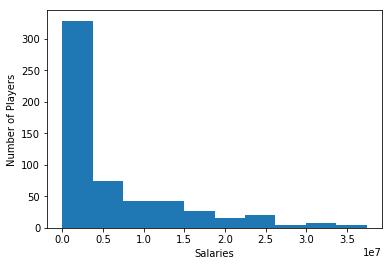

In [34]:
plt.hist(df_contracts['year0'])
plt.xlabel('Salaries')
plt.ylabel('Number of Players')
plt.show()

### Create new df combining Win Share contribution for each player with salary 

In [38]:
df_new = pd.merge(df_stats[['Player', 'WS']], df_contracts[['Tm','year0']], on = df_stats['Player'], how = 'outer')

KeyError: 0                Alex Abrines
1                  Quincy Acy
2                Jaylen Adams
3                Steven Adams
4                 Bam Adebayo
5                   Deng Adel
6      DeVaughn Akoon-Purcell
7           LaMarcus Aldridge
8                Rawle Alkins
9               Grayson Allen
10              Jarrett Allen
11               Kadeem Allen
12            Al-Farouq Aminu
13            Justin Anderson
14              Kyle Anderson
15              Ryan Anderson
16              Ryan Anderson
17              Ryan Anderson
18               Ike Anigbogu
19      Giannis Antetokounmpo
20       Kostas Antetokounmpo
21            Carmelo Anthony
23                 OG Anunoby
24           Ryan Arcidiacono
25               Trevor Ariza
26               Trevor Ariza
27               Trevor Ariza
28              D.J. Augustin
29              Deandre Ayton
30               Dwayne Bacon
                ...          
695          Hassan Whiteside
696            Andrew Wiggins
697             Alan Williams
698             C.J. Williams
699        Johnathan Williams
700          Kenrich Williams
701              Lou Williams
702           Marvin Williams
703           Robert Williams
704             Troy Williams
705               D.J. Wilson
706           Justise Winslow
707            Christian Wood
708            Christian Wood
709            Christian Wood
710              Delon Wright
711              Delon Wright
712              Delon Wright
714        Guerschon Yabusele
715                Nick Young
716            Thaddeus Young
717                Trae Young
718               Cody Zeller
719              Tyler Zeller
720              Tyler Zeller
721              Tyler Zeller
722                Ante Zizic
723               Ivica Zubac
724               Ivica Zubac
725               Ivica Zubac
Name: Player, Length: 700, dtype: object